In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [3]:
df = pd.read_csv('crime_data.csv')

In [4]:
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [5]:
pip install mysql-connector-python

In [6]:
 import mysql.connector

In [7]:
#connecting mysql

connection = mysql.connector.connect(
host="localhost",
user="root",
password="Summaya@1304",
database="newschema")

In [8]:
cursor = connection.cursor(buffered=True)

In [9]:
cursor.execute("SELECT * FROM newschema.crime_data")
rows = cursor.fetchall()

In [10]:
for row in rows:
    print(row)

(10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3)
(190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25)
(191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4)
(191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45)
(200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26)
(200100504, '01-04-2020', '01-04-2020', 'Central', 946, 'OTHER MISCELLANEOUS CRIME', 0, 'X', 'POLICE FACILITY', 'IC', '200 E 6TH ST', 34.

# Questions

Spatial Analysis: Where are the geographical hotspots for reported crimes?

In [11]:
sql_geographical_hotspots = cursor.execute("SELECT Lat, Lon, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY Lat, Lon,location ORDER BY crime_count DESC;")

rows = cursor.fetchall()

for row in rows:
    print(row)

(34.05, -118.26, 3)
(34.05, -118.25, 3)
(34.04, -118.25, 3)
(34.04, -118.26, 2)
(34.04, -118.25, 2)
(34.05, -118.26, 2)
(34.04, -118.25, 2)
(34.05, -118.25, 2)
(34.05, -118.26, 2)
(34.04, -118.25, 2)
(34.05, -118.24, 2)
(34.05, -118.24, 2)
(34.05, -118.26, 2)
(34.04, -118.25, 2)
(34.06, -118.24, 2)
(34.05, -118.25, 2)
(34.05, -118.26, 2)
(34.05, -118.26, 2)
(34.04, -118.24, 2)
(34.05, -118.24, 2)
(34.05, -118.26, 2)
(34.05, -118.26, 2)
(34.06, -118.24, 2)
(34.04, -118.27, 2)
(34.04, -118.25, 2)
(34.05, -118.25, 2)
(34.01, -118.3, 1)
(34.05, -118.25, 1)
(34.17, -118.4, 1)
(34.22, -118.45, 1)
(34.05, -118.26, 1)
(34.04, -118.25, 1)
(34.07, -118.24, 1)
(34.06, -118.24, 1)
(34.05, -118.26, 1)
(34.05, -118.24, 1)
(34.2, -118.43, 1)
(34.08, -118.37, 1)
(34.05, -118.25, 1)
(34.05, -118.26, 1)
(34.04, -118.25, 1)
(34.07, -118.28, 1)
(34.05, -118.26, 1)
(34.05, -118.25, 1)
(34.05, -118.25, 1)
(34.05, -118.26, 1)
(34.06, -118.24, 1)
(34.05, -118.26, 1)
(34.03, -118.27, 1)
(34.06, -118.24, 1)
(34

In [83]:
query ="SELECT Lat, Lon, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY Lat, Lon,location ORDER BY crime_count DESC;"

In [84]:
df_crime_locations = pd.read_sql(query, connection)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5224\1407508106.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_crime_locations = pd.read_sql(query, connection)


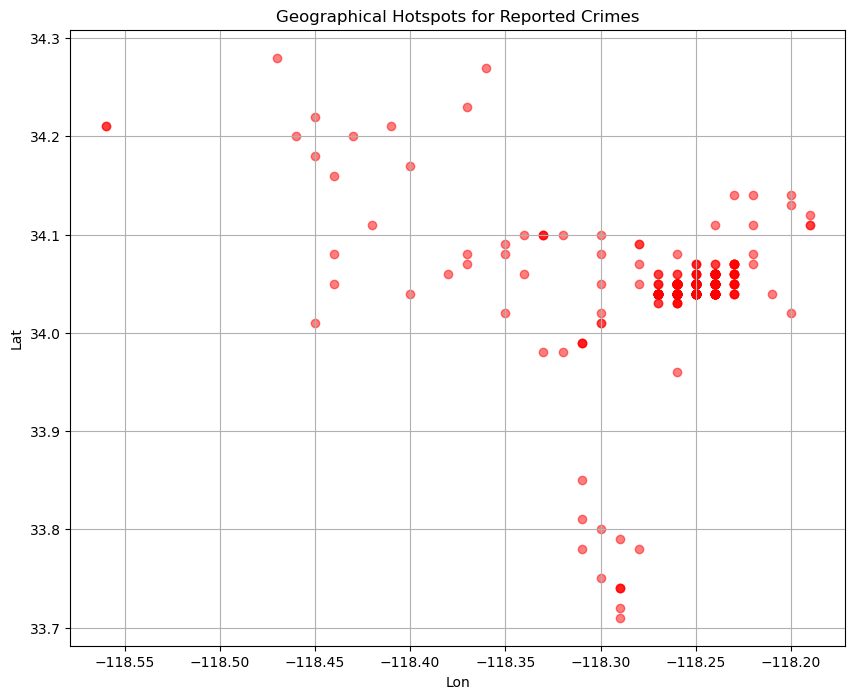

In [86]:
# Plotting a scatter plot using Matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(df_crime_locations['Lon'], df_crime_locations['Lat'], alpha=0.5, color='red')
plt.title('Geographical Hotspots for Reported Crimes')
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.grid(True)
plt.show()

# Victim Demographics:

What is the distribution of victim ages in reported crimes?


In [79]:
sql_distribution_victim_ages = cursor.execute("SELECT crm_cd_desc, vict_age, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY crm_cd_desc, vict_age;")

rows = cursor.fetchall()

for row in rows:
    print(row)  
                                               

('BATTERY - SIMPLE ASSAULT', 36, 3)
('BATTERY - SIMPLE ASSAULT', 25, 3)
('VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 1)
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 3)
('OTHER MISCELLANEOUS CRIME', 0, 1)
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 23, 2)
('BURGLARY FROM VEHICLE', 29, 4)
('CRIMINAL THREATS - NO WEAPON DISPLAYED', 35, 1)
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 41, 2)
('ARSON', 0, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 24, 2)
('THEFT OF IDENTITY', 40, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 19, 1)
('ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 38, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 55, 2)
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 66, 1)
('BRANDISH WEAPON', 34, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 35, 7)
('THEFT, PERSON', 44, 1)
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 41, 2)
('CRI

In [80]:
#removing null values
sql_distribution_victim_ages = cursor.execute("SELECT crm_cd_desc, vict_age, COUNT(*) AS crime_count FROM newschema.crime_data  where Vict_Age IS NOT NULL GROUP BY crm_cd_desc, vict_age;")

rows = cursor.fetchall()

for row in rows:
    print(row)  
                    



('BATTERY - SIMPLE ASSAULT', 36, 3)
('BATTERY - SIMPLE ASSAULT', 25, 3)
('VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 1)
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 3)
('OTHER MISCELLANEOUS CRIME', 0, 1)
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 23, 2)
('BURGLARY FROM VEHICLE', 29, 4)
('CRIMINAL THREATS - NO WEAPON DISPLAYED', 35, 1)
('THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 41, 2)
('ARSON', 0, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 24, 2)
('THEFT OF IDENTITY', 40, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 19, 1)
('ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 38, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 55, 2)
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 66, 1)
('BRANDISH WEAPON', 34, 1)
('SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 35, 7)
('THEFT, PERSON', 44, 1)
('VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 41, 2)
('CRI

In [72]:
# Fetching victim ages from the database
query_age_distribution = "SELECT Vict_Age FROM newschema.crime_data WHERE Vict_Age IS NOT NULL;"
df_victim_age_distribution = pd.read_sql(query_age_distribution, connection)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5224\563541243.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_victim_age_distribution = pd.read_sql(query_age_distribution, connection)


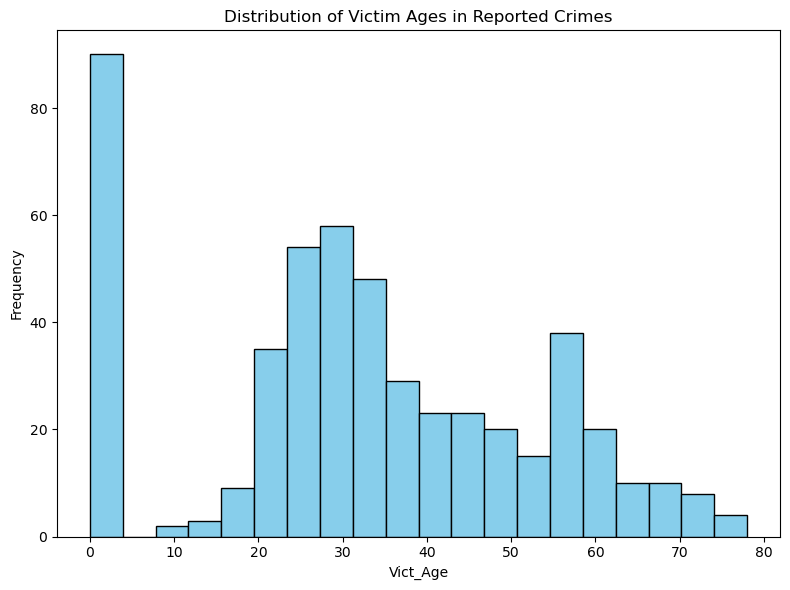

In [74]:
# Plotting a histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(df_victim_age_distribution['Vict_Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Vict_Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.tight_layout()
plt.show()

# Victim Demographics:

Is there a significant difference in crime rates between male and female victims?



In [81]:
sql_difference_crime_rates = cursor.execute("SELECT Vict_sex, COUNT(*) AS crime_count FROM crime_data GROUP BY Vict_sex;")
rows = cursor.fetchall()

for row in rows:
    print(row)  
                    

('F', 155)
('M', 278)
('X', 39)
('', 27)


In [67]:
# Fetching data directly from SQL
query = "SELECT vict_sex, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY vict_sex;"
df_crime_based_vict_sex = pd.read_sql(query, connection)


C:\Users\ACER\AppData\Local\Temp\ipykernel_5224\3205541370.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_crime_based_vict_sex = pd.read_sql(query, connection)


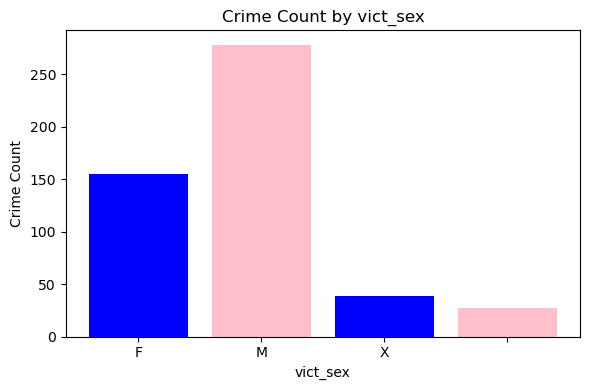

In [68]:
# Plotting a bar chart using Matplotlib
plt.figure(figsize=(6, 4))
plt.bar(df_crime_based_vict_sex['vict_sex'], df_crime_based_vict_sex['crime_count'], color=['blue', 'pink'])
plt.xlabel('vict_sex')
plt.ylabel('Crime Count')
plt.title('Crime Count by vict_sex')
plt.tight_layout()
plt.show()

# Location Analysis:
Where do most crimes occur based on the "Location" column?



In [30]:
sql_highest_crime_loaction = cursor.execute("SELECT Location, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY Location ORDER BY crime_count DESC ;")
rows = cursor.fetchall()

for row in rows:
    print(row) 

('800 N ALAMEDA ST', 14)
('700 W 7TH ST', 11)
('6TH', 6)
('300 E 5TH ST', 6)
('1100 S FIGUEROA ST', 6)
('100 E 5TH ST', 5)
('7TH ST', 5)
('500 S SAN PEDRO ST', 5)
('600 S SPRING ST', 5)
('700 S FIGUEROA ST', 4)
('600 W 7TH ST', 4)
('700 S FLOWER ST', 4)
('700 S GRAND AV', 4)
('5TH', 4)
('300 S BROADWAY', 4)
('800 W OLYMPIC BL', 4)
('800 S OLIVE ST', 3)
('8TH', 3)
('1ST', 3)
('600 N BROADWAY', 3)
('800 S FIGUEROA ST', 3)
('5TH ST', 3)
('800 S HILL ST', 3)
('600 S FIGUEROA ST', 3)
('4TH ST', 3)
('200 S SAN PEDRO ST', 3)
('400 W 8TH ST', 3)
('5000 OBAMA BL', 3)
('1100 W 39TH PL', 2)
('200 E 6TH ST', 2)
('1800 S MAIN ST', 2)
('1200 S GRAND AV', 2)
('1600 S HOPE ST', 2)
('600 S SAN PEDRO ST', 2)
('100 W 2ND ST', 2)
('4TH', 2)
('800 JAMES M WOOD BL', 2)
('GRAND', 2)
('7TH', 2)
('400 CASANOVA ST', 2)
('6TH ST', 2)
('HILL', 2)
('8TH ST', 2)
('ALPINE ST', 2)
('500 WALL ST', 2)
('1000 WILSHIRE BL', 2)
('300 E 2ND ST', 2)
('500 S MAIN ST', 2)
('HEWITT', 2)
('700 S MAIN ST', 2)
('LOS ANGELES', 2)


In [69]:
# Fetching data directly from SQL to find the location with the most crimes
query_location = "SELECT Location, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY Location ORDER BY crime_count DESC LIMIT 10;"
df_crime_based_location = pd.read_sql(query_location, connection)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5224\2595482628.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_crime_based_location = pd.read_sql(query_location, connection)


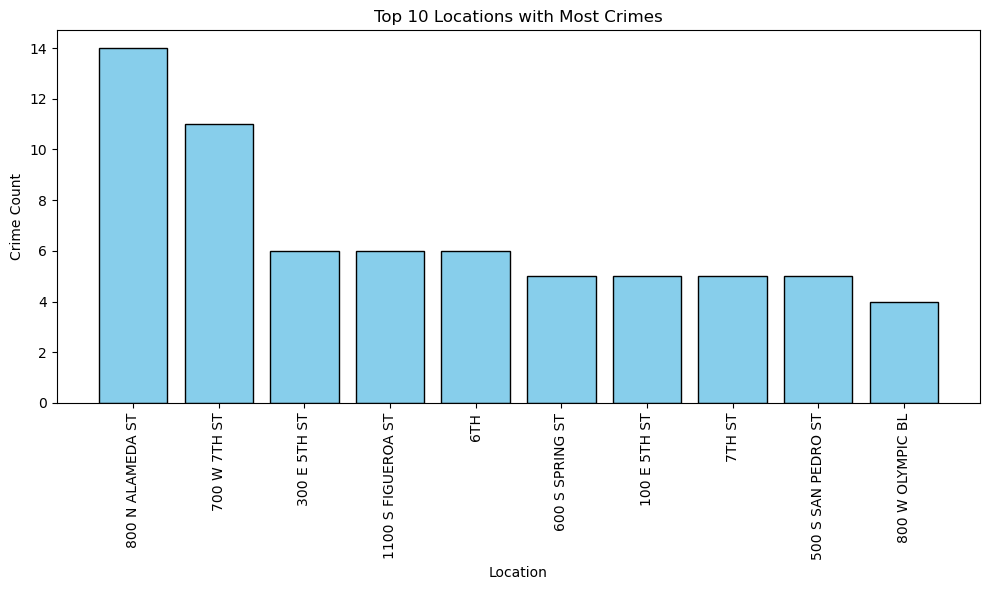

In [70]:
# Plotting a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_crime_based_location['Location'], df_crime_based_location['crime_count'], color='skyblue', edgecolor='black')
plt.xlabel('Location')
plt.ylabel('Crime Count')
plt.title('Top 10 Locations with Most Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

# Crime Code Analysis:
What is the distribution of reported crimes based on Crime Code?



In [85]:
sql_distribution_on_crime_code = cursor.execute("SELECT crm_cd, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY crm_cd;")
rows = cursor.fetchall()

for row in rows:
    print(row)  
                    

(624, 74)
(745, 23)
(740, 23)
(442, 28)
(946, 4)
(341, 26)
(330, 82)
(930, 7)
(648, 3)
(354, 10)
(230, 24)
(761, 5)
(350, 9)
(310, 16)
(480, 11)
(623, 5)
(440, 44)
(510, 28)
(210, 12)
(900, 2)
(888, 19)
(420, 9)
(886, 2)
(421, 1)
(647, 1)
(940, 1)
(662, 5)
(220, 4)
(625, 2)
(755, 1)
(649, 1)
(901, 3)
(320, 2)
(890, 1)
(351, 2)
(956, 2)
(820, 1)
(812, 1)
(920, 1)
(850, 2)
(666, 1)
(343, 1)


In [77]:
# Fetching crime codes and their counts from the database
query_crime_distribution = "SELECT crm_cd, COUNT(*) AS crime_count FROM newschema.crime_data GROUP BY crm_cd;"
df_crime_distribution = pd.read_sql(query_crime_distribution, connection)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5224\1750274340.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_crime_distribution = pd.read_sql(query_crime_distribution, connection)


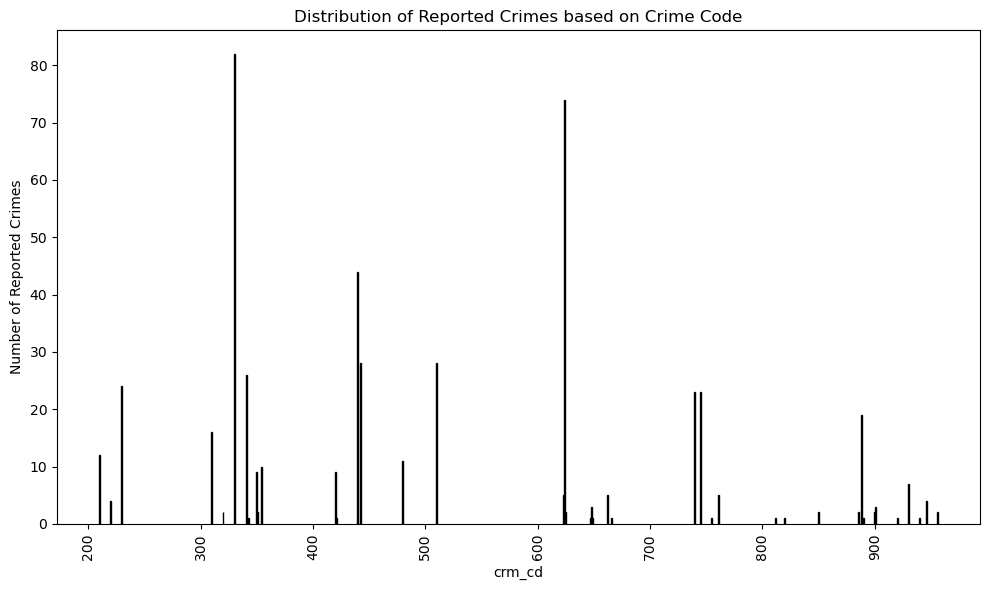

In [80]:
# Plotting a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_crime_distribution['crm_cd'], df_crime_distribution['crime_count'], color='skyblue', edgecolor='black')
plt.xlabel('crm_cd')
plt.ylabel('Number of Reported Crimes')
plt.title('Distribution of Reported Crimes based on Crime Code')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()